In [20]:
import pandas as pd
import benchmax.evaluation as ev
import matplotlib.pyplot as plt
import tikzplotlib


In [21]:
def get_data(solvers):
    param = {}
    for solver in solvers:
        param["stats_smtrat_15m_6Gi_"+solver+".xml"] = {"smtrat-static": solver, "smtrat-"+solver: solver}
    return ev.xmls_to_pandas(param,['mcsat-explanation-nlsat_explanation_called','mcsat-explanation-onecellcad_explanation_called','mcsat-explanation-fm_explanation_called'])

df = get_data(["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"])

for solver in ["MCSATNL"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-nlsat_explanation_called')].fillna(0).astype(int)

for solver in ["MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-onecellcad_explanation_called')].fillna(0).astype(int)
    
for solver in ["MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-fm_explanation_called')].fillna(0).astype(int)

df = df.join(ev.virtual_best(df, ["MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13"], "VB-LW", ['cells_constructed']))
df = df.join(ev.virtual_best(df, ["MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"], "VB-LW+", ['cells_constructed']))
df = df.join(ev.virtual_best(df, ["MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","MCSATOCNNASC"], "VB", ['cells_constructed']))
df = df.join(ev.virtual_best(df, ["MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13","MCSATFMICPVSOCNNASC"], "VB+", ['cells_constructed']))
df

MCSATNL          \
                                     answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2     timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2   memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2   memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2   memout   905.0   
...                                     ...     ...   
zankl/matrix-5-all-5.smt2           timeout   910.0   
zankl/matrix-5-all-6.smt2           timeout   910.0   
zankl/matrix-5-all-7.smt2           timeout   910.0   
zankl/matrix-5-all-8.smt2           timeout   910.0   
zankl/matrix-5-all-9.smt2           timeout   910.0   

                                                                               \
                                   mcsat-explanation-nlsat_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                           None   
20161105-Sturm-MBO/mbo_E10.smt2                                             1   
20161105-Sturm-MBO/mbo_E10E11.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E12.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E13.smt2                                       None   
...                                                                       ...   
zankl/matrix-5-all-5.smt2                                                   4   
zankl/matrix-5-all-6.smt2                                                   7   
zankl/matrix-5-all-7.smt2                                                   7   
zankl/matrix-5-all-8.smt2                                                   1   
zankl/matrix-5-all-9.smt2                                                   2   

                                   MCSATOCNNASC          \
                                         answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2           memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2         timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2       memout   905.0   
...                                         ...     ...   
zankl/matrix-5-all-5.smt2               timeout   910.0   
zankl/matrix-5-all-6.smt2               timeout   910.0   
zankl/matrix-5-all-7.smt2               timeout   910.0   
zankl/matrix-5-all-8.smt2               timeout   910.0   
zankl/matrix-5-all-9.smt2               timeout   910.0   

                                                                               \
                                   mcsat-explanation-nlsat_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                           None   
20161105-Sturm-MBO/mbo_E10.smt2                                          None   
20161105-Sturm-MBO/mbo_E10E11.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E12.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E13.smt2                                       None   
...                                                                       ...   
zankl/matrix-5-all-5.smt2                                                   4   
zankl/matrix-5-all-6.smt2                                                   6   
zankl/matrix-5-all-7.smt2                                                   7   
zankl/matrix-5-all-8.smt2                                                   1   
zankl/matrix-5-all-9.smt2                                                   2   

                                                                                    \
                                   mcsat-explanation-onecellcad_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                                None   
20161105-Sturm-MBO/mbo_E10.smt2                                                  1   
20161105-Sturm-MBO/mbo_E10E11.smt2                                            None   
20161105-Sturm

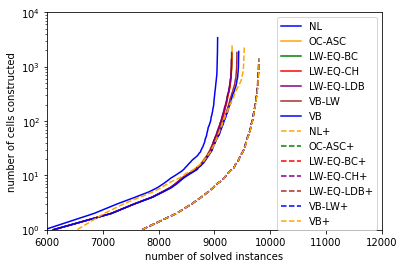

In [22]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","VB-LW","VB","MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13","VB-LW+","VB+"], "cells_constructed")
ax.set_xlim(left=6000, right=12000)
ax.set_ylim(bottom=1,top=10000)
ax.set_ylabel("number of cells constructed")

plt.yscale('log', base=10)

for i in range(7,14):
    ax.lines[i].set_linestyle('dashed')
colors = ['blue','orange','green','red','purple','brown','yellow']
for i in range(0,14):
    ax.lines[i].set_color(colors[i % 6])
ax.legend(["NL","OC-ASC","LW-EQ-BC","LW-EQ-CH","LW-EQ-LDB","VB-LW","VB","NL+","OC-ASC+","LW-EQ-BC+","LW-EQ-CH+","LW-EQ-LDB+","VB-LW+","VB+"])

#tikzplotlib.save("../plots/performance_profile_cells.tex")

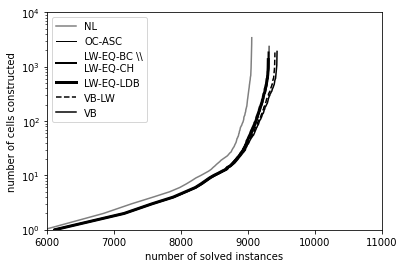

In [27]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH13","VB-LW","VB"], "cells_constructed")
ax.set_xlim(left=6000, right=11000)
ax.set_ylim(bottom=1,top=10000)
ax.set_ylabel("number of cells constructed")

plt.yscale('log', base=10)


ax.lines[0].set_color('gray')
ax.lines[5].set_color('black')
ax.lines[4].set_color('black')

ax.lines[1].set_color('black')
ax.lines[2].set_color('black')
ax.lines[3].set_color('black')
ax.lines[1].set_linewidth(1)
ax.lines[2].set_linewidth(2)
ax.lines[3].set_linewidth(3)

ax.lines[4].set_linestyle('dashed')

ax.legend(["NL","OC-ASC","LW-EQ-BC \\\\\nLW-EQ-CH","LW-EQ-LDB","VB-LW", "VB"],loc='upper left')

#tikzplotlib.save("../plots/performance_profile_cells.tex")

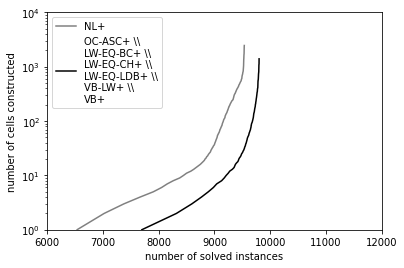

In [26]:
plt.figsize=[20,8]
ax = ev.performance_profile(df,["MCSATFMICPVSNL","VB+"], "cells_constructed")
ax.set_xlim(left=6000, right=12000)
ax.set_ylim(bottom=1,top=10000)
ax.set_ylabel("number of cells constructed")

plt.yscale('log', base=10)


ax.lines[0].set_color('gray')
ax.lines[1].set_color('black')

ax.legend(["NL+","OC-ASC+ \\\\\nLW-EQ-BC+ \\\\\nLW-EQ-CH+ \\\\\nLW-EQ-LDB+ \\\\\nVB-LW+ \\\\\nVB+"],loc='upper left')

#tikzplotlib.save("../plots/performance_profile_cells_plus.tex")